## 检验心理学现象
### 背景信息
在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

In [7]:
import pandas
df = pandas.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### 1.我们的自变量是什么？因变量是什么？
-  自变量是 文字条件（一致和不一致)
- 因变量是 说出同等大小的列表中的墨色名称的时间。

### 2.此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由
- 零假设：文字条件的不一致不会影响识别出文字颜色的时间。（H0：μs-μd =0）
- 对立假设：文字条件的不一致会影响识别出文字颜色的时间。（Ha：μs-μd≠0）
μs:一致文字条件下的时间均值（总体均值）。μd：不一致文字条件下的时间均值（总体均值）。

- 只有样本数据，没有总体参数,考虑使用t检验
- 随机挑选的测试人员，样本数据基本呈正态分布，符合t检验的假设前提。
- *又因为一个人同时参加两项测试，所以需要执行相依样本检验*。

### 3.报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [8]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### 4.提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Text(0,0.5,'Frequency distribution')

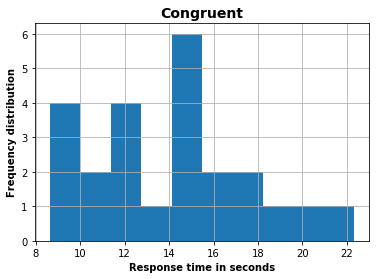

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(column='Congruent')
plt.title('Congruent', fontsize=14, fontweight='bold')
plt.xlabel('Response time in seconds',  fontweight='bold')
plt.ylabel('Frequency distribution',  fontweight='bold')

Text(0,0.5,'Frequency distribution')

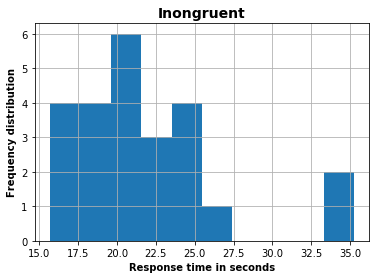

In [10]:
df.hist(column='Incongruent')
plt.title('Inongruent',fontsize=14, fontweight='bold')
plt.xlabel('Response time in seconds', fontweight='bold')
plt.ylabel('Frequency distribution', fontweight='bold')

文字一致样本的分布在8-22秒内；不一致的分布在15-26秒内，并且35秒处似乎是一个异常点

### 5.现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？


In [19]:
#number of subjects in the sample
n = len(df)
n

24

In [20]:
#point estimate of μi - μc -> PE (in seconds)
C = df['Congruent']; I = df['Incongruent']
PE = I.mean() - C.mean()
round(PE,2)

7.96

In [17]:
#s - sample standard deviation of differences
#1. D = sample difference
df['D'] = df['Incongruent'] - df['Congruent']

#2. DFM = difference from the mean
#SQD = squared differences from the mean
DFM = df['D'] - df['D'].mean()
df['SQD'] = DFM*DFM

#3. SSD = sum of squared differences
SSD = df['SQD'].sum()

#4. v = variance = SSD/(n-1)
v = SSD/(n-1)

#5. s = sqrt(v)
from math import *
s = sqrt(v)
round(s,2)

4.86

In [21]:
#t-statistic
#t = PE/(s/√n)
#PE = (μi - μc)
t = PE/(s/(sqrt(n)))
round(t,4)

8.0207

- 置信水平和关键统计值: 95%
- 自由度：23
- t-critical：2.069

- t-statistic > t-critical
- 8.0207 >2.069

### 结论
所以成功拒绝零假设，可以得出文字条件的不一致会影响识别出文字颜色的时间，与我的期望一致